In [1]:
import numpy as np
import numpy.ma as ma
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import scipy as sp
import netCDF4 as nc
from netCDF4 import Dataset
import h5py
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy
import iris
import xarray
import iris.quickplot as qplt
import iris.plot as iplt
import iris.coord_categorisation
import cartopy.feature as cfeature
import time
import statsmodels.api as sm
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker

In [2]:
cubes = iris.load('NCAR/CESM2_ssp126.nc')

C:\Users\hoonc\Anaconda3\lib\site-packages\iris\fileformats\cf.py:803: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(message % (variable_name, nc_var_name))
C:\Users\hoonc\Anaconda3\lib\site-packages\iris\fileformats\cf.py:1038: UserWarning: Ignoring variable 'lat_bnds' referenced by variable 'lat': Dimensions ('time', 'lat', 'nbnd') do not span ('lat',)
  warnings.warn(msg)
C:\Users\hoonc\Anaconda3\lib\site-packages\iris\fileformats\cf.py:1038: UserWarning: Ignoring variable 'lon_bnds' referenced by variable 'lon': Dimensions ('time', 'lon', 'nbnd') do not span ('lon',)
  warnings.warn(msg)


In [3]:
print(cubes)
cube = cubes[2]
print(cube)

0: lon_bnds / (1)                      (time: 1032; longitude: 288; -- : 2)
1: lat_bnds / (1)                      (time: 1032; latitude: 192; -- : 2)
2: air_temperature / (K)               (time: 1032; latitude: 192; longitude: 288)
air_temperature / (K)               (time: 1032; latitude: 192; longitude: 288)
     Dimension coordinates:
          time                           x               -               -
          latitude                       -               x               -
          longitude                      -               -               x
     Attributes:
          Conventions: CF-1.7 CMIP-6.2
          activity_id: ScenarioMIP
          branch_method: standard
          branch_time_in_child: 735110.0
          branch_time_in_parent: 735110.0
          case_id: 1719
          cesm_casename: b.e21.BSSP126cmip6.f09_g17.CMIP6-SSP1-2.6.101
          comment: TREFHT
          contact: cesm_cmip6@ucar.edu
          creation_date: 2020-05-27T16:14:08Z
          data_spec

In [4]:
print(cube.shape)

(1032, 192, 288)


C:\Users\hoonc\Anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:385: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


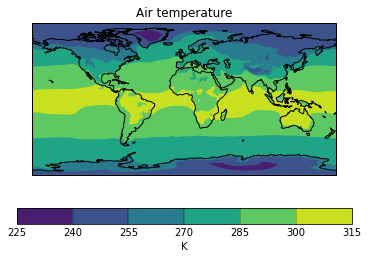

In [4]:
qplt.contourf(cube[0,:,:])
plt.gca().coastlines();
plt.show()

C:\Users\hoonc\Anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:385: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


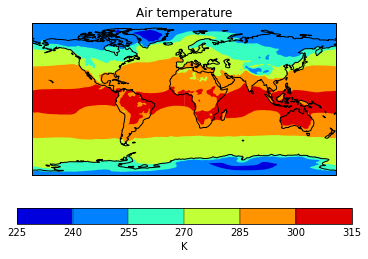

In [5]:
plt.set_cmap('jet')
qplt.contourf(cube[0,:,:])
plt.gca().coastlines()
plt.show()

C:\Users\hoonc\Anaconda3\lib\site-packages\iris\coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))


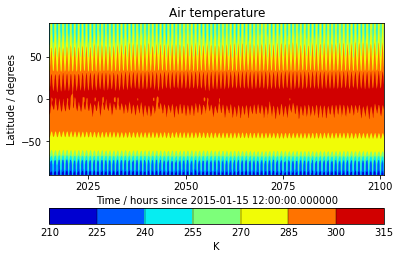

In [6]:
zonal_mean = cube.collapsed('longitude', iris.analysis.MEAN)
qplt.contourf(zonal_mean)
plt.show()

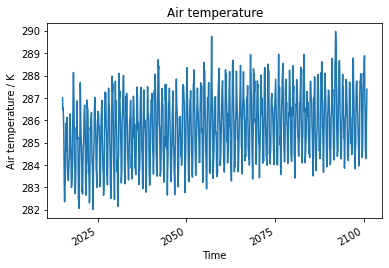

In [7]:
fig = plt.figure()
qplt.plot(cube[:,51,1])
fig.autofmt_xdate()
plt.show()

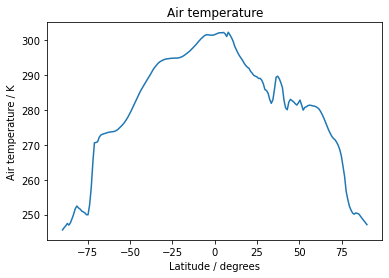

In [8]:
qplt.plot(cube[0,:,0])
plt.show()

C:\Users\hoonc\Anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:773: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_xticks(xticks, minor)
C:\Users\hoonc\Anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:820: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_yticks(yticks, minor)
C:\Users\hoonc\Anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:385: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


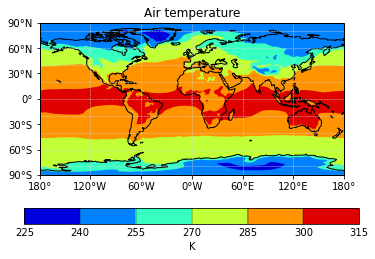

In [9]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_xticks([-180, -120, -60, 0, 60, 120, 180], crs=ccrs.PlateCarree())
ax.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())
# Lat & Lon lable formats
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
# gridline
ax.gridlines(color='lightgray', linestyle='--', linewidth=0.5)
qplt.contourf(cube[0,:,:])
plt.gca().coastlines()
plt.show()

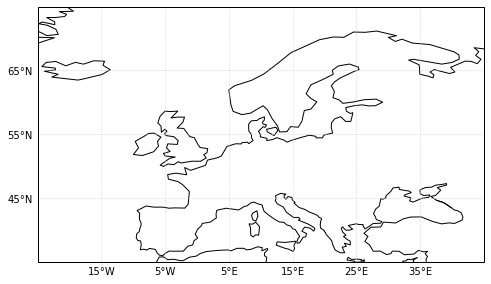

In [17]:
fig = plt.figure(figsize=(8,14))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-25, 45, 35, 75], crs=ccrs.PlateCarree())
#qplt.contourf(cube[0,:,:])
plt.gca().coastlines()
xticks = [-25, -15, -5, 5, 15, 25, 35, 45]
yticks = [35, 45, 55, 65, 75]
g1 = plt.gca().gridlines(color='lightgray', linestyle='--', linewidth=0.5)
g1.xlabels_bottom = True
g1.ylabels_left = True
g1.xformatter = LONGITUDE_FORMATTER
g1.yformatter = LATITUDE_FORMATTER
g1.xlocator = mticker.FixedLocator([-25, -15, -5, 5, 15, 25, 35, 45])
g1.ylocator = mticker.FixedLocator([35, 45, 55, 65, 75])
plt.show()

In [2]:
ncfile = Dataset('Extreme/NorESM2-MM_21.nc')
print(ncfile)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Conventions: CF-1.7 CMIP-6.2
    activity_id: CMIP
    branch_method: Hybrid-restart from year 1200-01-01 of piControl
    branch_time: 0.0
    branch_time_in_child: 0.0
    branch_time_in_parent: 438000.0
    contact: Please send any requests or bug reports to noresm-ncc@met.no.
    creation_date: 2019-12-04T07:29:34Z
    data_specs_version: 01.00.31
    experiment: 1 percent per year increase in CO2
    experiment_id: 1pctCO2
    external_variables: areacella
    forcing_index: 1
    frequency: mon
    further_info_url: https://furtherinfo.es-doc.org/CMIP6.NCC.NorESM2-MM.1pctCO2.none.r1i1p1f1
    grid: finite-volume grid with 0.9x1.25 degree lat/lon resolution
    grid_label: gn
    history: 2019-12-04T07:29:34Z ; CMOR rewrote data to be consistent with CMIP6, CF-1.7 CMIP-6.2 and CF standards.
    initialization_index: 1
    institution: NorESM Climate modeling Consortium consisting of CICERO (C

C:\Users\hoonc\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  


In [3]:
print(list(ncfile.variables))

['time', 'time_bnds', 'lat', 'lat_bnds', 'lon', 'lon_bnds', 'height', 'tas']


In [4]:
print(ncfile.variables)

OrderedDict([('time', <class 'netCDF4._netCDF4.Variable'>
int64 time(time)
    bounds: time_bnds
    axis: T
    long_name: time
    standard_name: time
    units: hours since 0001-01-16 12:00:00.000000
    calendar: noleap
unlimited dimensions: 
current shape = (1200,)
filling on, default _FillValue of -9223372036854775806 used), ('time_bnds', <class 'netCDF4._netCDF4.Variable'>
float64 time_bnds(time, bnds)
    _FillValue: nan
    coordinates: height
    units: days since 0001-01-01
unlimited dimensions: 
current shape = (1200, 2)
filling on), ('lat', <class 'netCDF4._netCDF4.Variable'>
float64 lat(lat)
    _FillValue: nan
    bounds: lat_bnds
    units: degrees_north
    axis: Y
    long_name: Latitude
    standard_name: latitude
unlimited dimensions: 
current shape = (192,)
filling on), ('lat_bnds', <class 'netCDF4._netCDF4.Variable'>
float64 lat_bnds(time, lat, bnds)
    _FillValue: nan
    coordinates: height
unlimited dimensions: 
current shape = (1200, 192, 2)
filling on), ('lo

C:\Users\hoonc\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  """Entry point for launching an IPython kernel.


In [18]:
time = ncfile.variables['time']
lat = ncfile.variables['lat']
lon = ncfile.variables['lon']
hgt = ncfile.variables['height']
tas = ncfile.variables['tas']
lat <- list.reverse(lat)
#lat = flipud(rot180(lat))

TypeError: descriptor 'reverse' requires a 'list' object but received a 'netCDF4._netCDF4.Variable'

In [6]:
print(tas.shape)
print(tas[1,:,:])

(1200, 192, 288)
[[233.13199 233.13199 233.13197 ... 233.13199 233.13199 233.13199]
 [233.75981 233.71642 233.56284 ... 233.7885  233.78412 233.77318]
 [234.76625 234.71524 234.69077 ... 235.02884 234.96733 234.8869 ]
 ...
 [236.44649 236.51129 236.57047 ... 236.24153 236.28656 236.37198]
 [236.76454 236.78738 236.80737 ... 236.6696  236.70697 236.73799]
 [236.93489 236.93594 236.93709 ... 236.9322  236.93301 236.93391]]


In [7]:
print(lat[:])

[-90.         -89.05759162 -88.11518325 -87.17277487 -86.23036649
 -85.28795812 -84.34554974 -83.40314136 -82.46073298 -81.51832461
 -80.57591623 -79.63350785 -78.69109948 -77.7486911  -76.80628272
 -75.86387435 -74.92146597 -73.97905759 -73.03664921 -72.09424084
 -71.15183246 -70.20942408 -69.26701571 -68.32460733 -67.38219895
 -66.43979058 -65.4973822  -64.55497382 -63.61256545 -62.67015707
 -61.72774869 -60.78534031 -59.84293194 -58.90052356 -57.95811518
 -57.01570681 -56.07329843 -55.13089005 -54.18848168 -53.2460733
 -52.30366492 -51.36125654 -50.41884817 -49.47643979 -48.53403141
 -47.59162304 -46.64921466 -45.70680628 -44.76439791 -43.82198953
 -42.87958115 -41.93717277 -40.9947644  -40.05235602 -39.10994764
 -38.16753927 -37.22513089 -36.28272251 -35.34031414 -34.39790576
 -33.45549738 -32.51308901 -31.57068063 -30.62827225 -29.68586387
 -28.7434555  -27.80104712 -26.85863874 -25.91623037 -24.97382199
 -24.03141361 -23.08900524 -22.14659686 -21.20418848 -20.2617801
 -19.3193717

In [11]:
print(lon[:])

[  0.     1.25   2.5    3.75   5.     6.25   7.5    8.75  10.    11.25
  12.5   13.75  15.    16.25  17.5   18.75  20.    21.25  22.5   23.75
  25.    26.25  27.5   28.75  30.    31.25  32.5   33.75  35.    36.25
  37.5   38.75  40.    41.25  42.5   43.75  45.    46.25  47.5   48.75
  50.    51.25  52.5   53.75  55.    56.25  57.5   58.75  60.    61.25
  62.5   63.75  65.    66.25  67.5   68.75  70.    71.25  72.5   73.75
  75.    76.25  77.5   78.75  80.    81.25  82.5   83.75  85.    86.25
  87.5   88.75  90.    91.25  92.5   93.75  95.    96.25  97.5   98.75
 100.   101.25 102.5  103.75 105.   106.25 107.5  108.75 110.   111.25
 112.5  113.75 115.   116.25 117.5  118.75 120.   121.25 122.5  123.75
 125.   126.25 127.5  128.75 130.   131.25 132.5  133.75 135.   136.25
 137.5  138.75 140.   141.25 142.5  143.75 145.   146.25 147.5  148.75
 150.   151.25 152.5  153.75 155.   156.25 157.5  158.75 160.   161.25
 162.5  163.75 165.   166.25 167.5  168.75 170.   171.25 172.5  173.75
 175. 

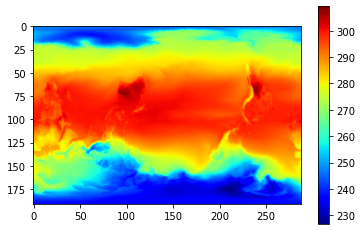

In [8]:
tas0 = tas[12,:,:]

plt.imshow(tas0, cmap='jet')
plt.colorbar()
plt.show()

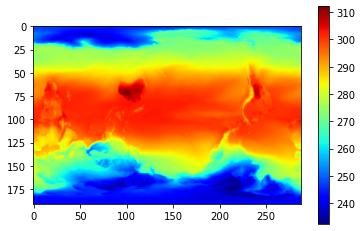

In [9]:
tasCC = tas[1080,:,:]

plt.imshow(tasCC, cmap='jet')
plt.colorbar()
plt.show()

In [10]:
axis xy

SyntaxError: invalid syntax (<ipython-input-10-f1ebb8d2de68>, line 1)